In [1]:
import numpy as np
import pandas as pd

# data aquization

In [137]:
df = pd.read_csv('soccer.csv')

In [53]:
df.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9
0,Sa 26 Feb,Philadelphia,1 - 1,Minnesota Utd,stats,(1-1),-,2,+
1,Su 27 Feb,Columbus Crew,4 - 0,Vancouver,stats,(2-0),+,4,-
2,Su 27 Feb,Los Angeles FC,3 - 0,Colorado Rapids,stats,(2-0),+,3,-
3,Su 27 Feb,Dallas,1 - 1,Toronto,stats,(1-1),-,2,+
4,Su 27 Feb,Austin,5 - 0,Cincinnati,stats,(3-0),+,5,-


In [54]:
df.shape

(935, 9)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Column1  935 non-null    object
 1   Column2  935 non-null    object
 2   Column3  935 non-null    object
 3   Column4  935 non-null    object
 4   Column5  935 non-null    object
 5   Column6  935 non-null    object
 6   Column7  935 non-null    object
 7   Column8  935 non-null    int64 
 8   Column9  935 non-null    object
dtypes: int64(1), object(8)
memory usage: 65.9+ KB


In [56]:
df.columns

Index(['Column1', 'Column2', 'Column3', 'Column4', 'Column5', 'Column6',
       'Column7', 'Column8', 'Column9'],
      dtype='object')

In [57]:
data_new = df.drop(columns=['Column1', 'Column5', 'Column6', 'Column7', 'Column8', 'Column9'])

In [58]:
data_new.head()

,Column2,Column3,Column4
0,Philadelphia,1 - 1,Minnesota Utd
1,Columbus Crew,4 - 0,Vancouver
2,Los Angeles FC,3 - 0,Colorado Rapids
3,Dallas,1 - 1,Toronto
4,Austin,5 - 0,Cincinnati


In [59]:
#renaming column name

In [60]:
data_new = data_new.rename(columns={'Column2': 'Home_team', 'Column3': 'score', 'Column4': 'Away_team'})

In [61]:
data_new.head()

,Home_team,score,Away_team
0,Philadelphia,1 - 1,Minnesota Utd
1,Columbus Crew,4 - 0,Vancouver
2,Los Angeles FC,3 - 0,Colorado Rapids
3,Dallas,1 - 1,Toronto
4,Austin,5 - 0,Cincinnati


In [62]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Home_team  935 non-null    object
 1   score      935 non-null    object
 2   Away_team  935 non-null    object
dtypes: object(3)
memory usage: 22.0+ KB


In [63]:
data_new.describe()

,Home_team,score,Away_team
count,935,935,935
unique,28,42,28
top,Philadelphia,2 - 1,Minnesota Utd
freq,34,112,34


In [64]:
#making two new column from the score column

In [65]:
data_new[['HomeTeamGoal', 'AwayTeamGoal']] = data_new['score'].str.split(' - ', expand=True)

In [66]:
data_new.head()

,Home_team,score,Away_team,HomeTeamGoal,AwayTeamGoal
0,Philadelphia,1 - 1,Minnesota Utd,1,1
1,Columbus Crew,4 - 0,Vancouver,4,0
2,Los Angeles FC,3 - 0,Colorado Rapids,3,0
3,Dallas,1 - 1,Toronto,1,1
4,Austin,5 - 0,Cincinnati,5,0


In [67]:
data_new.describe()

,Home_team,score,Away_team,HomeTeamGoal,AwayTeamGoal
count,935,935,935,935,935
unique,28,42,28,8,7
top,Philadelphia,2 - 1,Minnesota Utd,1,1
freq,34,112,34,289,351


In [68]:
data_new['Result'] = pd.np.where(data_new['HomeTeamGoal'] > data_new['AwayTeamGoal'], 'Win', pd.np.where(data_new['HomeTeamGoal'] < data_new['AwayTeamGoal'], 'Loss', 'Tie'))


C:\Users\rajiv\AppData\Local\Temp\ipykernel_17908\1823973713.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data_new['Result'] = pd.np.where(data_new['HomeTeamGoal'] > data_new['AwayTeamGoal'], 'Win', pd.np.where(data_new['HomeTeamGoal'] < data_new['AwayTeamGoal'], 'Loss', 'Tie'))


In [69]:
data_new.head()

,Home_team,score,Away_team,HomeTeamGoal,AwayTeamGoal,Result
0,Philadelphia,1 - 1,Minnesota Utd,1,1,Tie
1,Columbus Crew,4 - 0,Vancouver,4,0,Win
2,Los Angeles FC,3 - 0,Colorado Rapids,3,0,Win
3,Dallas,1 - 1,Toronto,1,1,Tie
4,Austin,5 - 0,Cincinnati,5,0,Win


In [70]:
data_new['Result'].unique()

array(['Tie', 'Win', 'Loss'], dtype=object)

In [71]:
data_new=data_new.drop(columns=['score'])

In [72]:
import matplotlib.pyplot as plt

In [73]:
result_counts = data_new['Result'].value_counts()

Text(0, 0.5, 'Count')

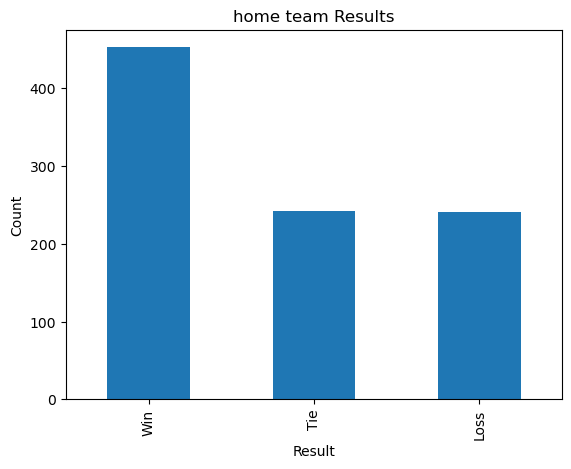

In [74]:
# Create a bar plot
result_counts.plot(kind='bar')

# Set the title and labels for the plot
plt.title('home team Results')
plt.xlabel('Result')
plt.ylabel('Count')

In [75]:
result_counts = data_new['HomeTeamGoal'].value_counts()

Text(0, 0.5, 'Count')

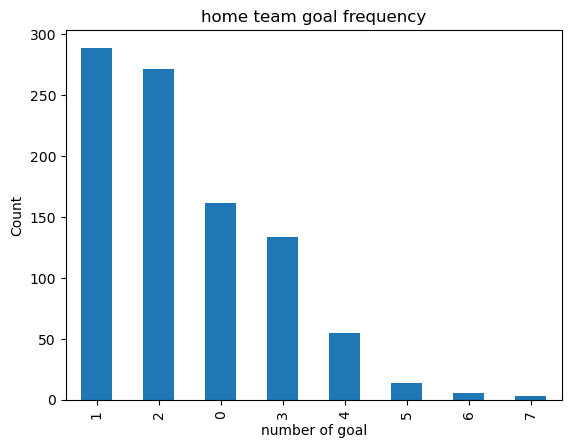

In [76]:
# Create a bar plot for home team goal frequency
result_counts.plot(kind='bar')
plt.title('home team goal frequency')
plt.xlabel('number of goal')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

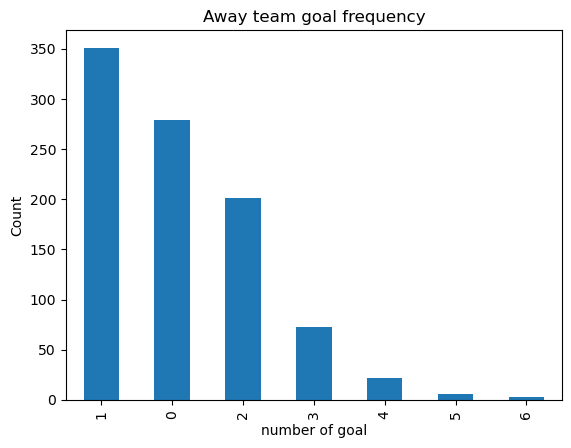

In [77]:
# Create a bar plot for away team goal frequency
result_counts = data_new['AwayTeamGoal'].value_counts()
# Create a bar plot
result_counts.plot(kind='bar')

# Set the title and labels for the plot
plt.title('Away team goal frequency')
plt.xlabel('number of goal')
plt.ylabel('Count')

In [78]:
list[data_new['Home_team'].unique()]

list[array(['Philadelphia', 'Columbus Crew', 'Los Angeles FC', 'Dallas',
       'Austin', 'DC United', 'Inter Miami', 'SJ Earthquakes', 'Portland',
       'Orlando City', 'Atlanta Utd', 'LA Galaxy', 'Houston Dynamo',
       'Seattle', 'New England', 'Toronto', 'Sporting KC', 'CF Montreal',
       'Chicago Fire', 'Cincinnati', 'Colorado Rapids', 'Minnesota Utd',
       'Real Salt Lake', 'Vancouver', 'Charlotte', 'New York City',
       'New York RB', 'Nashville SC'], dtype=object)]

In [79]:
data_new['Home_team'].nunique()

28

In [80]:
data_new['Away_team'].unique()

array(['Minnesota Utd', 'Vancouver', 'Colorado Rapids', 'Toronto',
       'Cincinnati', 'Charlotte', 'Chicago Fire', 'New York RB',
       'New England', 'CF Montreal', 'Sporting KC', 'New York City',
       'Real Salt Lake', 'Nashville SC', 'Dallas', 'Houston Dynamo',
       'Philadelphia', 'Columbus Crew', 'Orlando City', 'DC United',
       'Atlanta Utd', 'Seattle', 'LA Galaxy', 'Inter Miami', 'Portland',
       'Los Angeles FC', 'SJ Earthquakes', 'Austin'], dtype=object)

In [81]:
data_new['Away_team'].nunique()

28

In [82]:
# Create a list of all unique values in 'Home_team' and 'Away_team' columns
unique_teams = pd.concat([data_new['Home_team'], data_new['Away_team']]).unique()

# Map each unique value to a unique integer
team_mapping = pd.Series(pd.factorize(unique_teams)[0], index=unique_teams)

# Replace the values in 'Home_team' and 'Away_team' columns with the mapped integers
data_new['Home_team'] = data_new['Home_team'].map(team_mapping)
data_new['Away_team'] = data_new['Away_team'].map(team_mapping)


In [83]:
data_new.head()

,Home_team,Away_team,HomeTeamGoal,AwayTeamGoal,Result
0,0,21,1,1,Tie
1,1,23,4,0,Win
2,2,20,3,0,Win
3,3,15,1,1,Tie
4,4,19,5,0,Win


In [87]:
#converting Result column win as 1, loss as -1 and tie as 0

In [84]:
def convert_result(result):
    if result == 'Win':
        return 1
    elif result == 'Tie':
        return 0
    else:
        return -1

In [85]:
data_new['Result'] = data_new['Result'].apply(convert_result)

In [86]:
data_new.head()

,Home_team,Away_team,HomeTeamGoal,AwayTeamGoal,Result
0,0,21,1,1,0
1,1,23,4,0,1
2,2,20,3,0,1
3,3,15,1,1,0
4,4,19,5,0,1


In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [117]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_new[['Home_team', 'Away_team']], data_new['Result'], test_size=0.2, random_state=42)


In [118]:
# Create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)


In [119]:
# Train the model on the training data
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [120]:
# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.34759358288770054


In [ ]:
#Accuracy is poor and there are many reason for that
#small detaset(we cannont use very old data because team standings and there player changes very frequently)
#less feature column(we will try to add each team 2022 point per game and and team ranking via team point table)
#Non binary classification(instead of predicting hometeam- win, loss and tie we can predict only win or no win for the home team)
#we will try to do some hyper-parameter tunning

In [ ]:
#

In [166]:
team= pd.read_csv('team.csv',encoding='latin-1', error_bad_lines=False)

C:\Users\rajiv\AppData\Local\Temp\ipykernel_17908\3074796882.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  team= pd.read_csv('team.csv',encoding='latin-1', error_bad_lines=False)


In [167]:
team.head()

,Unnamed: 0,GP,W,D,L,GF,GA,GD,Pts,ÊÊÊÊÊForm,PPG,last 8,CS,FTS
0,ÊPhiladelphia,34,19,10,5,72,26,46,67,NaN,1.97,2.38,44%,18%
1,ÊLos Angeles FC,34,21,4,9,66,38,28,67,NaN,1.97,1.25,26%,9%
2,ÊCF Montreal,34,20,5,9,63,50,13,65,NaN,1.91,2.38,21%,15%
3,ÊAustin,34,16,8,10,65,49,16,56,NaN,1.65,1.00,24%,15%
4,ÊNew York City,34,16,7,11,57,41,16,55,NaN,1.62,1.25,41%,21%


In [ ]:
#last 8 column can be very efficient feature while testing on totally new data but since im testing on old data it will not help

In [168]:
print(team)

          Unnamed: 0  GP   W   D   L  GF  GA  GD  Pts  ÊÊÊÊÊForm   PPG  \
0      ÊPhiladelphia  34  19  10   5  72  26  46   67        NaN  1.97   
1    ÊLos Angeles FC  34  21   4   9  66  38  28   67        NaN  1.97   
2       ÊCF Montreal  34  20   5   9  63  50  13   65        NaN  1.91   
3            ÊAustin  34  16   8  10  65  49  16   56        NaN  1.65   
4     ÊNew York City  34  16   7  11  57  41  16   55        NaN  1.62   
5            ÊDallas  34  14  11   9  48  37  11   53        NaN  1.56   
6       ÊNew York RB  34  15   8  11  50  41   9   53        NaN  1.56   
7      ÊNashville SC  34  13  11  10  52  41  11   50        NaN  1.47   
8         ÊLA Galaxy  34  14   8  12  58  51   7   50        NaN  1.47   
9        ÊCincinnati  34  12  13   9  64  56   8   49        NaN  1.44   
10    ÊMinnesota Utd  34  14   6  14  48  51  -3   48        NaN  1.41   
11      ÊInter Miami  34  14   6  14  47  56  -9   48        NaN  1.41   
12     ÊOrlando City  34  14   6  14  

In [169]:
team = team.rename(columns={'Unnamed: 0': 'team'})

In [170]:
team.head(2)

,team,GP,W,D,L,GF,GA,GD,Pts,ÊÊÊÊÊForm,PPG,last 8,CS,FTS
0,ÊPhiladelphia,34,19,10,5,72,26,46,67,NaN,1.97,2.38,44%,18%
1,ÊLos Angeles FC,34,21,4,9,66,38,28,67,NaN,1.97,1.25,26%,9%


In [171]:
team_new = team.loc[:, ['team','Pts', 'PPG']]

In [172]:
team_new.head(2)

,team,Pts,PPG
0,ÊPhiladelphia,67,1.97
1,ÊLos Angeles FC,67,1.97


In [173]:
#correcting name issue of each name has a wrong character in first place

In [174]:
team_new['team'] = team_new['team'].str.slice(start=1)

In [175]:
team_new.head(2)

,team,Pts,PPG
0,Philadelphia,67,1.97
1,Los Angeles FC,67,1.97


In [176]:
df = pd.read_csv('soccer.csv')

In [177]:
data_new = df.drop(columns=['Column1', 'Column5', 'Column6', 'Column7', 'Column8', 'Column9'])

In [178]:
data_new = data_new.rename(columns={'Column2': 'Home_team', 'Column3': 'score', 'Column4': 'Away_team'})

In [179]:
data_new[['HomeTeamGoal', 'AwayTeamGoal']] = data_new['score'].str.split(' - ', expand=True)

In [180]:
data_new['Result'] = pd.np.where(data_new['HomeTeamGoal'] > data_new['AwayTeamGoal'], 'Win', pd.np.where(data_new['HomeTeamGoal'] < data_new['AwayTeamGoal'], 'Loss', 'Tie'))

C:\Users\rajiv\AppData\Local\Temp\ipykernel_17908\3268686699.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  data_new['Result'] = pd.np.where(data_new['HomeTeamGoal'] > data_new['AwayTeamGoal'], 'Win', pd.np.where(data_new['HomeTeamGoal'] < data_new['AwayTeamGoal'], 'Loss', 'Tie'))


In [181]:
data_new=data_new.drop(columns=['score'])

In [182]:
data_new.head(10)

,Home_team,Away_team,HomeTeamGoal,AwayTeamGoal,Result
0,Philadelphia,Minnesota Utd,1,1,Tie
1,Columbus Crew,Vancouver,4,0,Win
2,Los Angeles FC,Colorado Rapids,3,0,Win
3,Dallas,Toronto,1,1,Tie
4,Austin,Cincinnati,5,0,Win
5,DC United,Charlotte,3,0,Win
6,Inter Miami,Chicago Fire,0,0,Tie
7,SJ Earthquakes,New York RB,1,3,Loss
8,Portland,New England,2,2,Tie
9,Orlando City,CF Montreal,2,0,Win


In [183]:
data_new['index'] = range(len(data_new))

In [184]:
data_new.rename(columns={'Home_team': 'team'}, inplace=True)

In [185]:
data_new.columns

Index(['team', 'Away_team', 'HomeTeamGoal', 'AwayTeamGoal', 'Result', 'index'], dtype='object')

In [313]:
merged_df = pd.merge(data_new, team_new, on='team')

In [314]:
merged_df.head()

,team,Away_team,HomeTeamGoal,AwayTeamGoal,Result,index,Pts,PPG
0,Philadelphia,Minnesota Utd,1,1,Tie,0,67,1.97
1,Philadelphia,SJ Earthquakes,2,0,Win,36,67,1.97
2,Philadelphia,Charlotte,2,0,Win,66,67,1.97
3,Philadelphia,Columbus Crew,1,0,Win,76,67,1.97
4,Philadelphia,CF Montreal,1,1,Tie,100,67,1.97


In [315]:
merged_df = merged_df.rename(columns={'team': 'Home_team', 'Away_team': 'team', 'Pts': 'hometeam_pts', 'PPG': 'hometeam_ppg'})

In [316]:
merged_df.head()

,Home_team,team,HomeTeamGoal,AwayTeamGoal,Result,index,hometeam_pts,hometeam_ppg
0,Philadelphia,Minnesota Utd,1,1,Tie,0,67,1.97
1,Philadelphia,SJ Earthquakes,2,0,Win,36,67,1.97
2,Philadelphia,Charlotte,2,0,Win,66,67,1.97
3,Philadelphia,Columbus Crew,1,0,Win,76,67,1.97
4,Philadelphia,CF Montreal,1,1,Tie,100,67,1.97


In [317]:
merged_df_new = pd.merge(merged_df, team_new, on='team')

In [318]:
merged_df_new

,Home_team,team,HomeTeamGoal,AwayTeamGoal,Result,index,hometeam_pts,hometeam_ppg,Pts,PPG
0,Philadelphia,Minnesota Utd,1,1,Tie,0,67,1.97,48,1.41
1,Los Angeles FC,Minnesota Utd,2,0,Win,125,67,1.97,48,1.41
2,Los Angeles FC,Minnesota Utd,2,2,Tie,675,67,1.97,48,1.41
3,Dallas,Minnesota Utd,1,2,Loss,173,53,1.56,48,1.41
4,Dallas,Minnesota Utd,1,1,Tie,582,53,1.56,48,1.41
...,...,...,...,...,...,...,...,...,...,...
930,Vancouver,Real Salt Lake,2,1,Win,193,43,1.26,47,1.38
931,Vancouver,Real Salt Lake,0,4,Loss,633,43,1.26,47,1.38
932,Vancouver,Real Salt Lake,4,1,Win,762,43,1.26,47,1.38
933,New York City,Real Salt Lake,6,0,Win,97,55,1.62,47,1.38


In [319]:
merged_df_new.sort_values(by='index', inplace=True)

In [320]:
merged_df_new.head()

,Home_team,team,HomeTeamGoal,AwayTeamGoal,Result,index,hometeam_pts,hometeam_ppg,Pts,PPG
0,Philadelphia,Minnesota Utd,1,1,Tie,0,67,1.97,48,1.41
629,Columbus Crew,Vancouver,4,0,Win,1,46,1.35,43,1.26
426,Los Angeles FC,Colorado Rapids,3,0,Win,2,67,1.97,43,1.26
531,Dallas,Toronto,1,1,Tie,3,53,1.56,34,1.00
225,Austin,Cincinnati,5,0,Win,4,56,1.65,49,1.44


In [321]:
merged_df_new.sort_values(by='index', inplace=True)

In [322]:
merged_df_new.head()

,Home_team,team,HomeTeamGoal,AwayTeamGoal,Result,index,hometeam_pts,hometeam_ppg,Pts,PPG
0,Philadelphia,Minnesota Utd,1,1,Tie,0,67,1.97,48,1.41
629,Columbus Crew,Vancouver,4,0,Win,1,46,1.35,43,1.26
426,Los Angeles FC,Colorado Rapids,3,0,Win,2,67,1.97,43,1.26
531,Dallas,Toronto,1,1,Tie,3,53,1.56,34,1.00
225,Austin,Cincinnati,5,0,Win,4,56,1.65,49,1.44


In [323]:
merged_df_new = merged_df_new.reset_index()

In [324]:
merged_df_new.sort_values(by='index', inplace=True)

In [325]:
merged_df_new.head()

,level_0,Home_team,team,HomeTeamGoal,AwayTeamGoal,Result,index,hometeam_pts,hometeam_ppg,Pts,PPG
0,0,Philadelphia,Minnesota Utd,1,1,Tie,0,67,1.97,48,1.41
1,629,Columbus Crew,Vancouver,4,0,Win,1,46,1.35,43,1.26
2,426,Los Angeles FC,Colorado Rapids,3,0,Win,2,67,1.97,43,1.26
3,531,Dallas,Toronto,1,1,Tie,3,53,1.56,34,1.00
4,225,Austin,Cincinnati,5,0,Win,4,56,1.65,49,1.44


In [326]:
merged_df_new = merged_df_new.drop(columns=['level_0', 'index'])

In [327]:
final_data=merged_df_new.copy()#creating copy so we can use it laters

In [256]:
merged_df_new.head(2)

,Home_team,team,HomeTeamGoal,AwayTeamGoal,Result,hometeam_pts,hometeam_ppg,Pts,PPG
0,Philadelphia,Minnesota Utd,1,1,Tie,67,1.97,48,1.41
1,Columbus Crew,Vancouver,4,0,Win,46,1.35,43,1.26


In [257]:
merged_df_new = merged_df_new.rename(columns={
    'team': 'Away_team',
    'Pts': 'awayteam_pts',
    'PPG': 'awayteam_ppg'
})

In [259]:
# Creating a list of all unique values in 'Home_team' and 'Away_team' columns
unique_teams = pd.concat([merged_df_new['Home_team'], merged_df_new['Away_team']]).unique()

# Mapping each unique value to a unique integer
team_mapping = pd.Series(pd.factorize(unique_teams)[0], index=unique_teams)

# Replacing the values in 'Home_team' and 'Away_team' columns with the mapped integers
merged_df_new['Home_team'] = merged_df_new['Home_team'].map(team_mapping)
merged_df_new['Away_team'] = merged_df_new['Away_team'].map(team_mapping)


In [260]:
def convert_result(result):
    if result == 'Win':
        return 1
    elif result == 'Tie':
        return 0
    else:
        return -1

In [262]:
merged_df_new['Result'] =merged_df_new['Result'].apply(convert_result)

In [263]:
merged_df_new.head(2)

,Home_team,Away_team,HomeTeamGoal,AwayTeamGoal,Result,hometeam_pts,hometeam_ppg,awayteam_pts,awayteam_ppg
0,0,21,1,1,0,67,1.97,48,1.41
1,1,23,4,0,1,46,1.35,43,1.26


In [264]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [265]:
X_train, X_test, y_train, y_test = train_test_split(merged_df_new[['Home_team', 'Away_team','hometeam_pts','hometeam_ppg','awayteam_pts','awayteam_ppg']],merged_df_new['Result'], test_size=0.2, random_state=42)

In [269]:
X_test.head(2)

,Home_team,Away_team,hometeam_pts,hometeam_ppg,awayteam_pts,awayteam_ppg
321,10,13,40,1.18,41,1.21
70,20,22,43,1.26,47,1.38


In [273]:
# Creating a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [274]:
# Training the model on the training data
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [275]:
# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.3850267379679144


In [277]:
#Hyper parameyer tunning

In [281]:
from sklearn.model_selection import GridSearchCV

In [278]:
# Defining the range of hyperparameters to test
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4]
}

In [279]:
# Create a Random Forest model
rf = RandomForestClassifier(random_state=42)

In [282]:
# Use GridSearchCV to test different combinations of hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [50, 100, 150]})

In [283]:
# Print the best set of hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 100}


In [284]:
# Train a model on the full training set using the best hyperparameters
best_rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=6,
                       random_state=42)

In [286]:
# Evaluate the performance of the model on the validation set
val_acc = best_rf.score(X_test, y_test)
print("Validation Accuracy:", val_acc)

Validation Accuracy: 0.44385026737967914


In [288]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [299]:
# Initializing the Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [300]:
# Fitting the classifier to the training data
clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [301]:
# Predict the results on the testing data
y_pred = clf.predict(X_test)

In [302]:
# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

In [303]:
# Print the accuracy score
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 44.39%


In [ ]:
#Hyper parameyer tunning for gradient boosting

In [304]:
# Defining the hyperparameters to tune
param_grid = {'n_estimators': [50, 100, 150],
              'learning_rate': [0.01, 0.1, 0.5],
              'max_depth': [3, 4, 5]}

In [305]:
# Initializing the Gradient Boosting Classifier
clf = GradientBoostingClassifier(random_state=42)

In [306]:
# Initializing the Gradient Boosting Classifier
clf = GradientBoostingClassifier(random_state=42)

In [308]:
# Fitting the Grid Search object to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]})

In [309]:
# Print the best hyperparameters and the corresponding accuracy score
print("Best parameters: ", grid_search.best_params_)
print("Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

Best parameters:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50}
Accuracy: 48.93%


In [310]:
# Train a new model with the best hyperparameters on the entire training set
best_params = grid_search.best_params_
clf = GradientBoostingClassifier(n_estimators=best_params['n_estimators'], 
                                 learning_rate=best_params['learning_rate'], 
                                 max_depth=best_params['max_depth'], 
                                 random_state=42)
clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=4, n_estimators=50,
                           random_state=42)

In [311]:
# Evaluate the performance of the model on the testing set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Testing Accuracy: {:.2f}%".format(accuracy * 100))

Testing Accuracy: 44.39%


In [312]:
#Still getting low accuracy reason can be
#Multiple class to be predict
#more feature can be added like goal keeper rating of each team 

In [328]:
final_data.head()

,Home_team,team,HomeTeamGoal,AwayTeamGoal,Result,hometeam_pts,hometeam_ppg,Pts,PPG
0,Philadelphia,Minnesota Utd,1,1,Tie,67,1.97,48,1.41
1,Columbus Crew,Vancouver,4,0,Win,46,1.35,43,1.26
2,Los Angeles FC,Colorado Rapids,3,0,Win,67,1.97,43,1.26
3,Dallas,Toronto,1,1,Tie,53,1.56,34,1.00
4,Austin,Cincinnati,5,0,Win,56,1.65,49,1.44


In [330]:
final_d=final_data.copy()

In [329]:
#converting result win as 1 and loss and tie as 0 so less class will be thre in predictiob

In [331]:
final_d['Result'] = final_d['Result'].apply(lambda x: 1 if x == 'Win' else 0)

In [332]:
final_d.head()

,Home_team,team,HomeTeamGoal,AwayTeamGoal,Result,hometeam_pts,hometeam_ppg,Pts,PPG
0,Philadelphia,Minnesota Utd,1,1,0,67,1.97,48,1.41
1,Columbus Crew,Vancouver,4,0,1,46,1.35,43,1.26
2,Los Angeles FC,Colorado Rapids,3,0,1,67,1.97,43,1.26
3,Dallas,Toronto,1,1,0,53,1.56,34,1.00
4,Austin,Cincinnati,5,0,1,56,1.65,49,1.44


In [340]:
final_d = final_d.rename(columns={'AwayTeam': 'Away_team'})

In [346]:
final_d = final_d.rename(columns={'Pts': 'awayteam_pts','PPG': 'awayteam_ppg'})

In [347]:
final_d.head(2)

,Home_team,Away_team,HomeTeamGoal,AwayTeamGoal,Result,hometeam_pts,hometeam_ppg,awayteam_pts,awayteam_ppg
0,0,21,1,1,0,67,1.97,48,1.41
1,1,23,4,0,1,46,1.35,43,1.26


In [348]:
# Creating a list of all unique values in 'Home_team' and 'Away_team' columns
unique_teams = pd.concat([final_d['Home_team'], final_d['Away_team']]).unique()

# Mapping each unique value to a unique integer
team_mapping = pd.Series(pd.factorize(unique_teams)[0], index=unique_teams)

# Replacing the values in 'Home_team' and 'Away_team' columns with the mapped integers
final_d['Home_team'] = final_d['Home_team'].map(team_mapping)
final_d['Away_team'] = final_d['Away_team'].map(team_mapping)

In [349]:
final_d.head()

,Home_team,Away_team,HomeTeamGoal,AwayTeamGoal,Result,hometeam_pts,hometeam_ppg,awayteam_pts,awayteam_ppg
0,0,21,1,1,0,67,1.97,48,1.41
1,1,23,4,0,1,46,1.35,43,1.26
2,2,20,3,0,1,67,1.97,43,1.26
3,3,15,1,1,0,53,1.56,34,1.00
4,4,19,5,0,1,56,1.65,49,1.44


In [356]:
 final_d.corr()

,Home_team,Away_team,Result,hometeam_pts,hometeam_ppg,awayteam_pts,awayteam_ppg
Home_team,1.000000,-0.060162,-0.023126,-0.112585,-0.112203,0.002712,0.002699
Away_team,-0.060162,1.000000,-0.008457,0.004090,0.004086,-0.112585,-0.112203
Result,-0.023126,-0.008457,1.000000,0.085724,0.085567,-0.118011,-0.117874
hometeam_pts,-0.112585,0.004090,0.085724,1.000000,0.999953,-0.070724,-0.070698
hometeam_ppg,-0.112203,0.004086,0.085567,0.999953,1.000000,-0.070714,-0.070694
awayteam_pts,0.002712,-0.112585,-0.118011,-0.070724,-0.070714,1.000000,0.999953
awayteam_ppg,0.002699,-0.112203,-0.117874,-0.070698,-0.070694,0.999953,1.000000


In [350]:
from sklearn.model_selection import train_test_split

In [351]:
X_train, X_test, y_train, y_test = train_test_split(final_d[['Home_team', 'Away_team','hometeam_pts','hometeam_ppg','awayteam_pts','awayteam_ppg']],merged_df_new['Result'], test_size=0.2, random_state=42)

In [353]:
#using model gradient boosting

In [352]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [354]:
# Defining the hyperparameters to tune
param_grid = {'n_estimators': [50, 100, 150],
              'learning_rate': [0.01, 0.1, 0.5],
              'max_depth': [3, 4, 5]}

In [355]:
# Initializing the Gradient Boosting Classifier
clf = GradientBoostingClassifier(random_state=42)

In [357]:
# Initializing the Gradient Boosting Classifier
clf = GradientBoostingClassifier(random_state=42)

In [358]:
# Fitting the Grid Search object to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]})

In [359]:
# Print the best hyperparameters and the corresponding accuracy score
print("Best parameters: ", grid_search.best_params_)
print("Accuracy: {:.2f}%".format(grid_search.best_score_ * 100))

Best parameters:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50}
Accuracy: 48.93%


# logistics regression

In [360]:
from sklearn.linear_model import LogisticRegression

In [361]:
model = LogisticRegression()

In [362]:
# Fit the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

In [363]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [364]:
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.44385026737967914


# SVM

In [373]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [374]:
# Create the SVM classifier model
model1 = SVC(kernel='linear', C=1)

In [375]:
# Fit the model on the training data
model1.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [379]:
# Make predictions on the test data
y_pred = model1.predict(X_test)

In [380]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)

In [381]:
accuracy

0.45989304812834225

In [ ]:
#Hyper parameter tunning

In [388]:
from sklearn import svm

In [392]:
# create a dictionary of hyperparameters to tune
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 1]}

In [393]:
# create a GridSearchCV object and fit to training set
clf = svm.SVC()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [394]:
# print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}


In [395]:
# use the best hyperparameters to make predictions on the testing set
y_pred = grid_search.predict(X_test)

In [396]:
# evaluate the performance of the SVM classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.45989304812834225


In [398]:
# create a dictionary of hyperparameters to tune
param_grid = {'C': [0.1, 1, 10], 'kernel': ['sigmoid'], 'gamma': [0.1, 1]}

In [399]:
# create a GridSearchCV object and fit to training set
clf = svm.SVC()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1],
                         'kernel': ['sigmoid']})

In [400]:
# print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'sigmoid'}


In [402]:
# use the best hyperparameters to make predictions on the testing set
y_pred = grid_search.predict(X_test)

In [403]:
# evaluate the performance of the SVM classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.45989304812834225


In [404]:
#accuracy is still low we will try to get more dimentuion like goalkeeper rating and last 8 game rating of team

In [ ]:
#Again we will add some feature column like goal save % for each team 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [4]:
import seaborn as sns

In [5]:
from sklearn import svm

# data acquisition and preprocessing

In [475]:
final_data.head()

,Home_team,team,HomeTeamGoal,AwayTeamGoal,Result,hometeam_pts,hometeam_ppg,Pts,PPG
0,Philadelphia,Minnesota Utd,1,1,Tie,67,1.97,48,1.41
1,Columbus Crew,Vancouver,4,0,Win,46,1.35,43,1.26
2,Los Angeles FC,Colorado Rapids,3,0,Win,67,1.97,43,1.26
3,Dallas,Toronto,1,1,Tie,53,1.56,34,1.00
4,Austin,Cincinnati,5,0,Win,56,1.65,49,1.44


In [410]:
final_d = final_data.rename(columns={'Pts': 'awayteam_pts','PPG': 'awayteam_ppg'})

In [411]:
final_d.head()

,Home_team,team,HomeTeamGoal,AwayTeamGoal,Result,hometeam_pts,hometeam_ppg,awayteam_pts,awayteam_ppg
0,Philadelphia,Minnesota Utd,1,1,Tie,67,1.97,48,1.41
1,Columbus Crew,Vancouver,4,0,Win,46,1.35,43,1.26
2,Los Angeles FC,Colorado Rapids,3,0,Win,67,1.97,43,1.26
3,Dallas,Toronto,1,1,Tie,53,1.56,34,1.00
4,Austin,Cincinnati,5,0,Win,56,1.65,49,1.44


In [472]:
goalkeeper=pd.read_csv("goalkeeper.csv",encoding='latin-1', error_bad_lines=False)

C:\Users\rajiv\AppData\Local\Temp\ipykernel_17908\2566112384.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  goalkeeper=pd.read_csv("goalkeeper.csv",encoding='latin-1', error_bad_lines=False)


In [476]:
goalkeeper.head()

,Squad,Performance Save%,Penalty Kicks Save%
0,Atlanta Utd,61.6,0.0
1,Austin,72.7,28.6
2,CF Montral,64.2,0.0
3,Charlotte,69.2,0.0
4,Chicago Fire,67.7,0.0


In [477]:
final_d['team'].unique()

array(['Minnesota Utd', 'Vancouver', 'Colorado Rapids', 'Toronto',
       'Cincinnati', 'Charlotte', 'Chicago Fire', 'New York RB',
       'New England', 'CF Montreal', 'Sporting KC', 'New York City',
       'Real Salt Lake', 'Nashville SC', 'Dallas', 'Houston Dynamo',
       'Philadelphia', 'Columbus Crew', 'Orlando City', 'DC United',
       'Atlanta Utd', 'Seattle', 'LA Galaxy', 'Inter Miami', 'Portland',
       'Los Angeles FC', 'SJ Earthquakes', 'Austin'], dtype=object)

In [478]:
goalkeeper = goalkeeper.rename(columns={'Squad': 'team'})

In [479]:
goalkeeper['team'].unique()

array(['Atlanta Utd', 'Austin', 'CF Montr\x8eal', 'Charlotte',
       'Chicago Fire', 'Colorado Rapids', 'Columbus Crew', 'D.C. United',
       'FC Cincinnati', 'FC Dallas', 'Houston Dynamo', 'Inter Miami',
       'LA Galaxy', 'Los Angeles FC', 'Minnesota Utd', 'Nashville',
       'New England', 'NY Red Bulls', 'NYCFC', 'Orlando City',
       'Philadelphia', 'Portland Timbers', 'Real Salt Lake', 'San Jose',
       'Seattle', 'Sporting KC', 'Toronto FC', 'Vancouver'], dtype=object)

In [480]:
team_name_changes= {
    'CF Montr\x8eal': 'CF Montreal',
    'NYCFC': 'New York City',
    'Toronto FC':'Toronto',
    'FC Cincinnati':'Cincinnati',
    'NY Red Bulls':'New York RB',
    'Nashville':'Nashville SC',
    'FC Dallas':'Dallas',
    'D.C. United':'DC United',
    'Portland Timbers':'Portland',
    'San Jose':'SJ Earthquakes'
}

In [481]:
# Replace the old team names with the new team names
goalkeeper['team'] =goalkeeper['team'].replace(team_name_changes)

In [482]:
goalkeeper['team'].unique()

array(['Atlanta Utd', 'Austin', 'CF Montreal', 'Charlotte',
       'Chicago Fire', 'Colorado Rapids', 'Columbus Crew', 'DC United',
       'Cincinnati', 'Dallas', 'Houston Dynamo', 'Inter Miami',
       'LA Galaxy', 'Los Angeles FC', 'Minnesota Utd', 'Nashville SC',
       'New England', 'New York RB', 'New York City', 'Orlando City',
       'Philadelphia', 'Portland', 'Real Salt Lake', 'SJ Earthquakes',
       'Seattle', 'Sporting KC', 'Toronto', 'Vancouver'], dtype=object)

In [483]:
final_d['index'] = range(len(final_d))

In [484]:
final_d.head(2)

,Home_team,team,HomeTeamGoal,AwayTeamGoal,Result,hometeam_pts,hometeam_ppg,awayteam_pts,awayteam_ppg,index
0,Philadelphia,Minnesota Utd,1,1,Tie,67,1.97,48,1.41,0
1,Columbus Crew,Vancouver,4,0,Win,46,1.35,43,1.26,1


In [485]:
final_d.shape

(935, 10)

In [486]:
merged_data = pd.merge(final_d, goalkeeper, on='team')

In [487]:
merged_data.sort_values(by='index', inplace=True)

In [488]:
merged_data.head(2)

,Home_team,team,HomeTeamGoal,AwayTeamGoal,Result,hometeam_pts,hometeam_ppg,awayteam_pts,awayteam_ppg,index,Performance Save%,Penalty Kicks Save%
0,Philadelphia,Minnesota Utd,1,1,Tie,67,1.97,48,1.41,0,71.3,20.0
34,Columbus Crew,Vancouver,4,0,Win,46,1.35,43,1.26,1,64.4,28.6


In [489]:
merged_data = merged_data.reset_index()

In [490]:
merged_data.head(2)

,level_0,Home_team,team,HomeTeamGoal,AwayTeamGoal,Result,hometeam_pts,hometeam_ppg,awayteam_pts,awayteam_ppg,index,Performance Save%,Penalty Kicks Save%
0,0,Philadelphia,Minnesota Utd,1,1,Tie,67,1.97,48,1.41,0,71.3,20.0
1,34,Columbus Crew,Vancouver,4,0,Win,46,1.35,43,1.26,1,64.4,28.6


In [491]:
merged_data.shape

(935, 13)

In [492]:
merged_data =merged_data.rename(columns={'team': 'Away_team', 
                        'Performance Save%': 'Away_G_save%', 
                        'Penalty Kicks Save%': 'Away_p_save%',
                       'Home_team':'team'})

In [497]:
merged_data.head(2)

,level_0,team,Away_team,HomeTeamGoal,AwayTeamGoal,Result,hometeam_pts,hometeam_ppg,awayteam_pts,awayteam_ppg,index,Away_G_save%,Away_p_save%
0,0,Philadelphia,Minnesota Utd,1,1,Tie,67,1.97,48,1.41,0,71.3,20.0
1,34,Columbus Crew,Vancouver,4,0,Win,46,1.35,43,1.26,1,64.4,28.6


In [498]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   level_0       935 non-null    int64  
 1   team          935 non-null    object 
 2   Away_team     935 non-null    object 
 3   HomeTeamGoal  935 non-null    object 
 4   AwayTeamGoal  935 non-null    object 
 5   Result        935 non-null    object 
 6   hometeam_pts  935 non-null    int64  
 7   hometeam_ppg  935 non-null    float64
 8   awayteam_pts  935 non-null    int64  
 9   awayteam_ppg  935 non-null    float64
 10  index         935 non-null    int64  
 11  Away_G_save%  935 non-null    float64
 12  Away_p_save%  935 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 95.1+ KB


In [499]:
merged_data_new = pd.merge(merged_data, goalkeeper, on='team')

In [500]:
merged_data_new.head()

,level_0,team,Away_team,HomeTeamGoal,AwayTeamGoal,Result,hometeam_pts,hometeam_ppg,awayteam_pts,awayteam_ppg,index,Away_G_save%,Away_p_save%,Performance Save%,Penalty Kicks Save%
0,0,Philadelphia,Minnesota Utd,1,1,Tie,67,1.97,48,1.41,0,71.3,20.0,82.5,20.0
1,867,Philadelphia,SJ Earthquakes,2,0,Win,67,1.97,35,1.03,36,66.1,0.0,82.5,20.0
2,172,Philadelphia,Charlotte,2,0,Win,67,1.97,42,1.24,66,69.2,0.0,82.5,20.0
3,563,Philadelphia,Columbus Crew,1,0,Win,67,1.97,46,1.35,76,73.2,0.0,82.5,20.0
4,294,Philadelphia,CF Montreal,1,1,Tie,67,1.97,65,1.91,100,64.2,0.0,82.5,20.0


In [501]:
merged_data_new.shape

(935, 15)

In [502]:
merged_data_new=merged_data_new.rename(columns={'team': 'Home_team', 
                        'Performance Save%': 'Home_G_save%', 
                        'Penalty Kicks Save%': 'Home_p_save%',})

In [503]:
merged_data_new.head(2)

,level_0,Home_team,Away_team,HomeTeamGoal,AwayTeamGoal,Result,hometeam_pts,hometeam_ppg,awayteam_pts,awayteam_ppg,index,Away_G_save%,Away_p_save%,Home_G_save%,Home_p_save%
0,0,Philadelphia,Minnesota Utd,1,1,Tie,67,1.97,48,1.41,0,71.3,20.0,82.5,20.0
1,867,Philadelphia,SJ Earthquakes,2,0,Win,67,1.97,35,1.03,36,66.1,0.0,82.5,20.0


In [506]:
merged_data_new.head(10)

,level_0,Home_team,Away_team,HomeTeamGoal,AwayTeamGoal,Result,hometeam_pts,hometeam_ppg,awayteam_pts,awayteam_ppg,index,Away_G_save%,Away_p_save%,Home_G_save%,Home_p_save%
0,0,Philadelphia,Minnesota Utd,1,1,Tie,67,1.97,48,1.41,0,71.3,20.0,82.5,20.0
1,867,Philadelphia,SJ Earthquakes,2,0,Win,67,1.97,35,1.03,36,66.1,0.0,82.5,20.0
2,172,Philadelphia,Charlotte,2,0,Win,67,1.97,42,1.24,66,69.2,0.0,82.5,20.0
3,563,Philadelphia,Columbus Crew,1,0,Win,67,1.97,46,1.35,76,73.2,0.0,82.5,20.0
4,294,Philadelphia,CF Montreal,1,1,Tie,67,1.97,65,1.91,100,64.2,0.0,82.5,20.0
5,226,Philadelphia,New York RB,1,1,Tie,67,1.97,53,1.56,146,65.5,0.0,82.5,20.0
6,770,Philadelphia,Inter Miami,0,0,Tie,67,1.97,48,1.41,157,66.7,0.0,82.5,20.0
7,144,Philadelphia,Cincinnati,1,1,Tie,67,1.97,49,1.44,205,69.6,30.0,82.5,20.0
8,362,Philadelphia,New York City,2,1,Win,67,1.97,55,1.62,224,66.4,0.0,82.5,20.0
9,636,Philadelphia,DC United,7,0,Win,67,1.97,27,0.79,249,64.0,40.0,82.5,20.0


In [507]:
merged_data_new=merged_data_new.sort_values(by='index')

In [510]:
merged_data_new.head(2)

,Home_team,Away_team,HomeTeamGoal,AwayTeamGoal,Result,hometeam_pts,hometeam_ppg,awayteam_pts,awayteam_ppg,Away_G_save%,Away_p_save%,Home_G_save%,Home_p_save%
0,Philadelphia,Minnesota Utd,1,1,Tie,67,1.97,48,1.41,71.3,20.0,82.5,20.0
34,Columbus Crew,Vancouver,4,0,Win,46,1.35,43,1.26,64.4,28.6,73.2,0.0


In [509]:
merged_data_new = merged_data_new.drop(columns=['level_0', 'index'])

In [511]:
merged_data_new.head(2)

,Home_team,Away_team,HomeTeamGoal,AwayTeamGoal,Result,hometeam_pts,hometeam_ppg,awayteam_pts,awayteam_ppg,Away_G_save%,Away_p_save%,Home_G_save%,Home_p_save%
0,Philadelphia,Minnesota Utd,1,1,Tie,67,1.97,48,1.41,71.3,20.0,82.5,20.0
34,Columbus Crew,Vancouver,4,0,Win,46,1.35,43,1.26,64.4,28.6,73.2,0.0


In [512]:
merged_data_new = merged_data_new.reset_index()

In [513]:
merged_data_new.head(2)

,index,Home_team,Away_team,HomeTeamGoal,AwayTeamGoal,Result,hometeam_pts,hometeam_ppg,awayteam_pts,awayteam_ppg,Away_G_save%,Away_p_save%,Home_G_save%,Home_p_save%
0,0,Philadelphia,Minnesota Utd,1,1,Tie,67,1.97,48,1.41,71.3,20.0,82.5,20.0
1,34,Columbus Crew,Vancouver,4,0,Win,46,1.35,43,1.26,64.4,28.6,73.2,0.0


In [515]:
merged_data_new = merged_data_new.drop(columns=['index'])

In [517]:
merged_data_new.head(5)

,Home_team,Away_team,HomeTeamGoal,AwayTeamGoal,Result,hometeam_pts,hometeam_ppg,awayteam_pts,awayteam_ppg,Away_G_save%,Away_p_save%,Home_G_save%,Home_p_save%
0,Philadelphia,Minnesota Utd,1,1,Tie,67,1.97,48,1.41,71.3,20.0,82.5,20.0
1,Columbus Crew,Vancouver,4,0,Win,46,1.35,43,1.26,64.4,28.6,73.2,0.0
2,Los Angeles FC,Colorado Rapids,3,0,Win,67,1.97,43,1.26,70.3,9.1,70.7,0.0
3,Dallas,Toronto,1,1,Tie,53,1.56,34,1.00,65.8,25.0,75.9,28.6
4,Austin,Cincinnati,5,0,Win,56,1.65,49,1.44,69.6,30.0,72.7,28.6


In [518]:
#this is fonal dataset saving it as csv file

In [519]:
merged_data_new.to_csv('final_dataset.csv', index=False)

# Final_project

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [ ]:
import seaborn as sns

In [ ]:
from sklearn import svm

In [6]:
msl=pd.read_csv("final_dataset.csv")

In [7]:
msl.head()

,Home_team,Away_team,HomeTeamGoal,AwayTeamGoal,Result,hometeam_pts,hometeam_ppg,awayteam_pts,awayteam_ppg,Away_G_save%,Away_p_save%,Home_G_save%,Home_p_save%
0,Philadelphia,Minnesota Utd,1,1,Tie,67,1.97,48,1.41,71.3,20.0,82.5,20.0
1,Columbus Crew,Vancouver,4,0,Win,46,1.35,43,1.26,64.4,28.6,73.2,0.0
2,Los Angeles FC,Colorado Rapids,3,0,Win,67,1.97,43,1.26,70.3,9.1,70.7,0.0
3,Dallas,Toronto,1,1,Tie,53,1.56,34,1.00,65.8,25.0,75.9,28.6
4,Austin,Cincinnati,5,0,Win,56,1.65,49,1.44,69.6,30.0,72.7,28.6


In [8]:
msl.shape

(935, 13)

In [9]:
msl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Home_team     935 non-null    object 
 1   Away_team     935 non-null    object 
 2   HomeTeamGoal  935 non-null    int64  
 3   AwayTeamGoal  935 non-null    int64  
 4   Result        935 non-null    object 
 5   hometeam_pts  935 non-null    int64  
 6   hometeam_ppg  935 non-null    float64
 7   awayteam_pts  935 non-null    int64  
 8   awayteam_ppg  935 non-null    float64
 9   Away_G_save%  935 non-null    float64
 10  Away_p_save%  935 non-null    float64
 11  Home_G_save%  935 non-null    float64
 12  Home_p_save%  935 non-null    float64
dtypes: float64(6), int64(4), object(3)
memory usage: 95.1+ KB


In [10]:
msl.describe()

,HomeTeamGoal,AwayTeamGoal,hometeam_pts,hometeam_ppg,awayteam_pts,awayteam_ppg,Away_G_save%,Away_p_save%,Home_G_save%,Home_p_save%
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,1.691979,1.185027,46.872727,1.378545,46.872727,1.378545,69.447273,16.178182,69.447273,16.178182
std,1.266979,1.089659,9.480503,0.278720,9.480503,0.278720,4.709336,15.019541,4.709336,15.019541
min,0.000000,0.000000,27.000000,0.790000,27.000000,0.790000,61.600000,0.000000,61.600000,0.000000
25%,1.000000,0.000000,40.000000,1.180000,40.000000,1.180000,65.800000,0.000000,65.800000,0.000000
50%,2.000000,1.000000,47.000000,1.380000,47.000000,1.380000,69.300000,14.300000,69.300000,14.300000
75%,2.000000,2.000000,53.000000,1.560000,53.000000,1.560000,73.200000,28.600000,73.200000,28.600000
max,7.000000,6.000000,67.000000,1.970000,67.000000,1.970000,82.500000,50.000000,82.500000,50.000000


In [11]:
msl.isnull().sum()

Home_team       0
Away_team       0
HomeTeamGoal    0
AwayTeamGoal    0
Result          0
hometeam_pts    0
hometeam_ppg    0
awayteam_pts    0
awayteam_ppg    0
Away_G_save%    0
Away_p_save%    0
Home_G_save%    0
Home_p_save%    0
dtype: int64

In [12]:
result_counts = msl['Result'].value_counts()

Text(0, 0.5, 'Count')

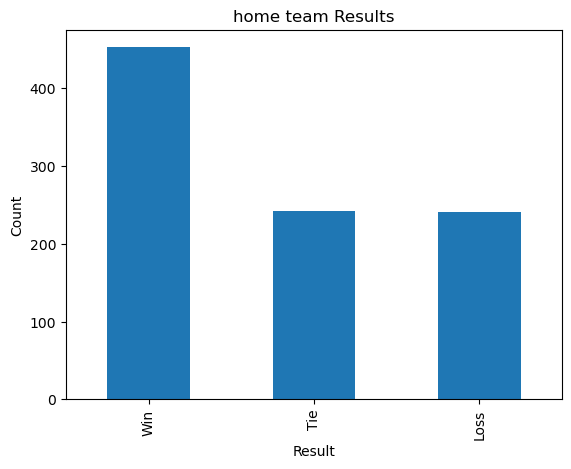

In [13]:
# Create a bar plot
result_counts.plot(kind='bar')

# Set the title and labels for the plot
plt.title('home team Results')
plt.xlabel('Result')
plt.ylabel('Count')

In [14]:
result_counts = msl['HomeTeamGoal'].value_counts()

Text(0, 0.5, 'Count')

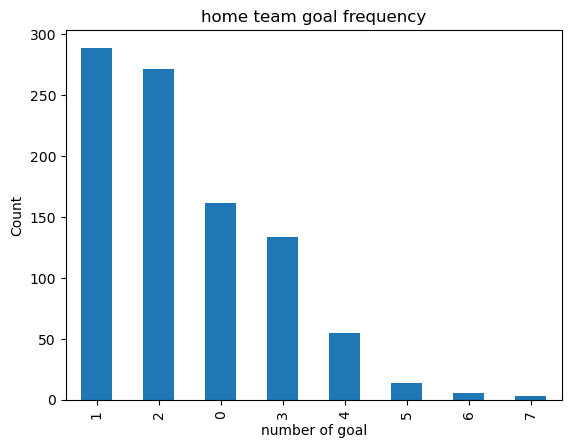

In [15]:
# Create a bar plot for home team goal frequency
result_counts.plot(kind='bar')
plt.title('home team goal frequency')
plt.xlabel('number of goal')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

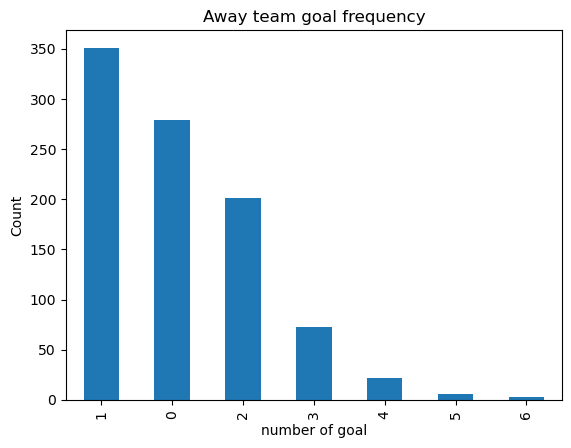

In [16]:
# Create a bar plot for away team goal frequency
result_counts = msl['AwayTeamGoal'].value_counts()
# Create a bar plot
result_counts.plot(kind='bar')

# Set the title and labels for the plot
plt.title('Away team goal frequency')
plt.xlabel('number of goal')
plt.ylabel('Count')

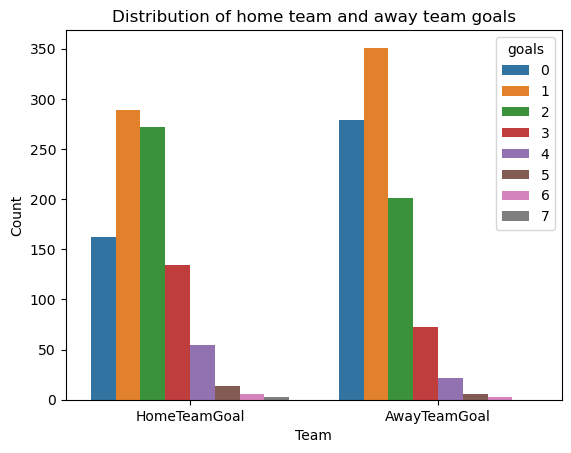

In [17]:
goals_df = msl[['HomeTeamGoal', 'AwayTeamGoal']]
goals_melted = goals_df.melt(var_name='team', value_name='goals')
sns.countplot(x='team', hue='goals', data=goals_melted)
# Set the title and labels for the plot
plt.title('Distribution of home team and away team goals')
plt.xlabel('Team')
plt.ylabel('Count')
plt.show()

In [18]:
def convert_result(result):
    if result == 'Win':
        return 1
    elif result == 'Tie':
        return 0
    else:
        return -1

In [19]:
msl['Result'] =msl['Result'].apply(convert_result)

In [20]:
msl.head(2)

,Home_team,Away_team,HomeTeamGoal,AwayTeamGoal,Result,hometeam_pts,hometeam_ppg,awayteam_pts,awayteam_ppg,Away_G_save%,Away_p_save%,Home_G_save%,Home_p_save%
0,Philadelphia,Minnesota Utd,1,1,0,67,1.97,48,1.41,71.3,20.0,82.5,20.0
1,Columbus Crew,Vancouver,4,0,1,46,1.35,43,1.26,64.4,28.6,73.2,0.0


In [21]:
msl.corr()

,HomeTeamGoal,AwayTeamGoal,Result,hometeam_pts,hometeam_ppg,awayteam_pts,awayteam_ppg,Away_G_save%,Away_p_save%,Home_G_save%,Home_p_save%
HomeTeamGoal,1.000000,0.051407,0.575385,0.115194,0.115155,-0.154531,-0.154988,-0.090041,0.091514,0.064225,0.001644
AwayTeamGoal,0.051407,1.000000,-0.594607,-0.076278,-0.076775,0.054413,0.054683,0.047992,0.046099,-0.110555,0.009523
Result,0.575385,-0.594607,1.000000,0.101738,0.101605,-0.133161,-0.133288,-0.071431,0.018918,0.074481,-0.013952
hometeam_pts,0.115194,-0.076278,0.101738,1.000000,0.999953,-0.070724,-0.070698,-0.042932,0.015823,0.399572,-0.228391
hometeam_ppg,0.115155,-0.076775,0.101605,0.999953,1.000000,-0.070714,-0.070694,-0.043129,0.015793,0.400247,-0.230011
awayteam_pts,-0.154531,0.054413,-0.133161,-0.070724,-0.070714,1.000000,0.999953,0.399572,-0.228391,-0.025973,0.006868
awayteam_ppg,-0.154988,0.054683,-0.133288,-0.070698,-0.070694,0.999953,1.000000,0.400247,-0.230011,-0.026302,0.006538
Away_G_save%,-0.090041,0.047992,-0.071431,-0.042932,-0.043129,0.399572,0.400247,1.000000,0.244594,-0.039737,0.038699
Away_p_save%,0.091514,0.046099,0.018918,0.015823,0.015793,-0.228391,-0.230011,0.244594,1.000000,0.026232,0.003070
Home_G_save%,0.064225,-0.110555,0.074481,0.399572,0.400247,-0.025973,-0.026302,-0.039737,0.026232,1.000000,0.244594


<AxesSubplot:>

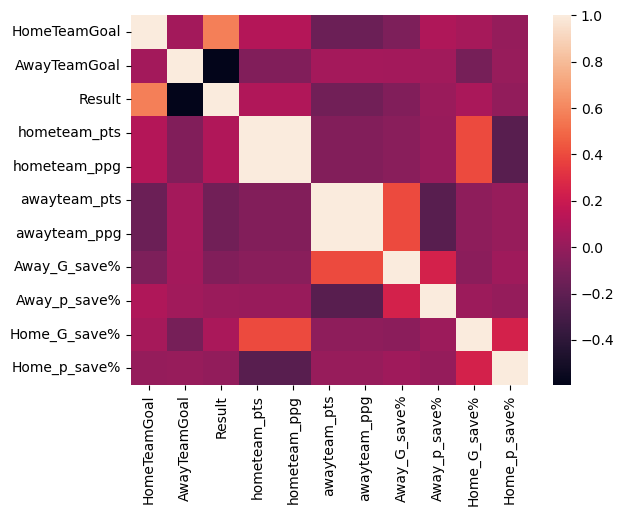

In [22]:
sns.heatmap(msl.corr())

In [23]:
#we cannot use home team goal and away team goal for winner prediction because we cannot have this data before game result

In [24]:
msl = msl.drop(['HomeTeamGoal', 'AwayTeamGoal'], axis=1)

In [25]:
msl.head(2)

,Home_team,Away_team,Result,hometeam_pts,hometeam_ppg,awayteam_pts,awayteam_ppg,Away_G_save%,Away_p_save%,Home_G_save%,Home_p_save%
0,Philadelphia,Minnesota Utd,0,67,1.97,48,1.41,71.3,20.0,82.5,20.0
1,Columbus Crew,Vancouver,1,46,1.35,43,1.26,64.4,28.6,73.2,0.0


In [26]:
#Applying one hot coding on both column home team and away team

In [27]:
msl_encoded = pd.get_dummies(msl, columns=['Home_team', 'Away_team'])

In [28]:
msl_encoded.head()

,Result,hometeam_pts,hometeam_ppg,awayteam_pts,awayteam_ppg,Away_G_save%,Away_p_save%,Home_G_save%,Home_p_save%,Home_team_Atlanta Utd,...,Away_team_New York RB,Away_team_Orlando City,Away_team_Philadelphia,Away_team_Portland,Away_team_Real Salt Lake,Away_team_SJ Earthquakes,Away_team_Seattle,Away_team_Sporting KC,Away_team_Toronto,Away_team_Vancouver
0,0,67,1.97,48,1.41,71.3,20.0,82.5,20.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,46,1.35,43,1.26,64.4,28.6,73.2,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,67,1.97,43,1.26,70.3,9.1,70.7,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,53,1.56,34,1.00,65.8,25.0,75.9,28.6,0,...,0,0,0,0,0,0,0,0,1,0
4,1,56,1.65,49,1.44,69.6,30.0,72.7,28.6,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
X = msl_encoded.drop(['Result'], axis=1)
y = msl_encoded['Result']

In [30]:
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.1, random_state=42)

In [33]:
from sklearn.svm import SVC

In [34]:
# Train an SVM classifier on the training set
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
# Evaluate the SVM classifier on the test set
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.4787234042553192


In [38]:
#the Accuracyis 48 % on test data

In [39]:
#Hyperparameter tunning

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

In [41]:
# define the hyperparameter grid to search over
param_dist = {'C': np.logspace(-3, 3, 7), 
              'kernel': ['linear', 'rbf'], 
              'gamma': np.logspace(-3, 3, 7),
              'class_weight': ['balanced', None]}

In [42]:
# define the SVM model
model = SVC()

In [43]:
# define the randomized search object
random_search = RandomizedSearchCV(estimator=model, 
                                   param_distributions=param_dist, 
                                   n_iter=10, 
                                   scoring='accuracy', 
                                   n_jobs=-1, 
                                   cv=5)

In [44]:
# perform the randomized search
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'class_weight': ['balanced', None],
                                        'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'kernel': ['linear', 'rbf']},
                   scoring='accuracy')

In [45]:
# print the best hyperparameters and corresponding score
print('Best Hyperparameters: ', random_search.best_params_)
print('Best Score: ', random_search.best_score_)

Best Hyperparameters:  {'kernel': 'linear', 'gamma': 10.0, 'class_weight': None, 'C': 100.0}
Best Score:  0.48394618202310513
